# Logistic Regression in R

Logistic regression (also known as **binary logistic regression**) in R is a classification algorithm used to model the probability of an event’s success (1) or failure (0). It is appropriate when the dependent variable is binary (e.g., 0/1, True/False, Yes/No).

At its core, logistic regression uses the **logistic (sigmoid) function**, which maps any real-valued input to a value between 0 and 1, interpretable as a probability. This lets us describe the relationship between input features and the probability of a binary outcome.

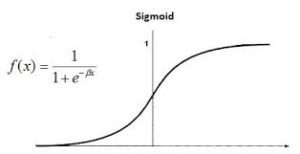

## Mathematical Formulation

A logistic regression model can be written as:

> **Probability of success**  
> $$P = \frac{1}{1 + e^{-\bigl(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n\bigr)}}$$

Here:

- \(P\) is the probability that the outcome equals 1.  
- \(x_1, x_2, \dots, x_n\) are the predictor variables.  
- \(\beta_0\) is the intercept.  
- \(\beta_1, \beta_2, \dots, \beta_n\) are the coefficients.


## Odds and Odds Ratio

- The **odds** of success are defined as  
  $$\text{odds} = \frac{P}{1 - P}.$$
- The **odds ratio (OR)** quantifies how odds change with a one‑unit increase in a predictor:
  - \(\text{OR} = 1\): no change in odds.
  - \(\text{OR} = 2\): success is twice as likely as failure.
  - \(\text{OR} = 0.5\): failure is twice as likely as success.


## Logit Link Function

Logistic regression belongs to the family of **generalized linear models (GLM)**. It uses the **logit** link to connect the linear predictor to the probability:

> **Logit of \(P\)**  
> $$\text{logit}(P) \;=\;\log\!\Bigl(\tfrac{P}{1 - P}\Bigr)\;=\;\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n.$$

This transformation ensures the model’s output always stays between 0 and 1 and that it is linear in the log‑odds.


## Parameter Estimation

Logistic regression estimates the parameters \(\beta_i\) by **maximum likelihood estimation (MLE)**. MLE finds the set of coefficients that maximize the probability of observing the given data.


## Interpretation of Coefficients

Each coefficient \(\beta_i\) represents the change in the **log‑odds** for a one‑unit increase in \(x_i\), holding all other variables constant:

- If \(\beta_i > 0\), increasing \(x_i\) **increases** the probability of success.
- If \(\beta_i < 0\), increasing \(x_i\) **decreases** the probability of success.


## Code Implementation

We will fit a logistic regression model on the built‑in `mtcars` dataset, using **wt** (weight) and **disp** (displacement) to predict the engine type **vs** (0 = V‑shaped, 1 = straight).

1. **Load libraries and data**  
   ```r
   library(dplyr)
   data(mtcars)
```

output:
```
> head(mtcars)
                   mpg cyl disp  hp drat    wt  qsec vs am gear carb
Mazda RX4         21.0   6  160 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag     21.0   6  160 110 3.90 2.875 17.02  0  1    4    4
Datsun 710        22.8   4  108  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive    21.4   6  258 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout 18.7   8  360 175 3.15 3.440 17.02  0  0    3    2
Valiant           18.1   6  225 105 2.76 3.460 20.22  1  0    3    1
```

### 2. Splitting the Dataset

We’ll use the **caTools** package to randomly split the `mtcars` data into:

- **80%** for training (`train_reg`)  
- **20%** for testing (`test_reg`)  

This ensures we train on one subset and evaluate on unseen data.

```r
# Install & load caTools (only once)
install.packages("caTools")
library(caTools)

# Set seed for reproducibility
set.seed(123)

# Create split indicator (TRUE = train, FALSE = test)
split <- sample.split(mtcars$vs, SplitRatio = 0.8)

# Subset into training and testing sets
train_reg <- subset(mtcars, split == TRUE)
test_reg  <- subset(mtcars, split == FALSE)
```

### 3. Building the Model

We now train our logistic regression model on the **training set** (`train_reg`) using `glm()`. We specify:

- **Formula**: `vs ~ wt + disp`  
- **Family**: `binomial(link = "logit")`  

This fits the model  
$$
\text{logit}\bigl(P(vs=1)\bigr)
=
\beta_0 + \beta_1\,wt + \beta_2\,disp
$$

```r
logistic_model <- glm(vs ~ wt + disp,
                    data = train_reg,
                    family = "binomial")
logistic_model
```
output:
```
Call:  glm(formula = vs ~ wt + disp, family = "binomial", data = train_reg)

Coefficients:
(Intercept)           wt         disp  
   -2.20629      5.35552     -0.07982  

Degrees of Freedom: 24 Total (i.e. Null);  22 Residual
Null Deviance:	    34.3 
Residual Deviance: 12.8 	AIC: 18.8
```
```R
summary(logistic_model)
```

output:
```
Call:
glm(formula = vs ~ wt + disp, family = "binomial", data = train_reg)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -2.20629    3.89542  -0.566   0.5711  
wt           5.35552    3.26748   1.639   0.1012  
disp        -0.07982    0.04035  -1.978   0.0479 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 34.296  on 24  degrees of freedom
Residual deviance: 12.796  on 22  degrees of freedom
AIC: 18.796

Number of Fisher Scoring iterations: 8
```

### Interpreting the `summary(model)` Output

When you run `summary(model)`, you’ll see:

- **Call**  
  The formula and dataset used to fit the model.

- **Deviance Residuals**  
  Summary of residuals (difference between observed and fitted values). Smaller absolute values indicate a better fit.

- **Coefficients**  
  | Predictor | Estimate | Std. Error | z value | Pr(>|z|) |  
  |-----------|----------|------------|---------|----------|  
  Shows each β coefficient (log‑odds change), its standard error, z‑statistic, and p‑value.

- **Significance Codes**  
  Symbols (e.g., `***`, `**`, `*`) indicating p‑value thresholds for each predictor.

- **Dispersion Parameter**  
  Fixed at 1 for binomial models.

- **Null Deviance**  
  Deviance of the model with only the intercept (no predictors).

- **Residual Deviance**  
  Deviance after including predictors—should be lower than the null deviance for a better fit.

- **AIC (Akaike Information Criterion)**  
  A measure of model quality that penalizes complexity. Lower AIC = better trade‑off between fit and simplicity.

- **Number of Fisher Scoring Iterations**  
  How many iterations were required to converge on the maximum‑likelihood estimates.

#### Interpreting the Logistic Regression Model Output:

The `summary(logistic_model)` provides detailed information about the fitted logistic regression model. Here's a step-by-step interpretation:

1. **Call**:  
   The formula used to fit the model is `vs ~ wt + disp`, which means we are predicting the variable `vs` (engine type) using the predictors `wt` (weight) and `disp` (displacement). The model is fitted using the binomial family for logistic regression, as indicated by `family = "binomial"`.

2. **Coefficients**:  
   The coefficients section shows the estimates of the model parameters (β) along with their standard errors, z-values, and p-values:
   
   - **(Intercept)**:  
     The estimated intercept is **-2.20629**. This is the log-odds of having a straight engine (`vs = 1`) when both `wt` and `disp` are equal to zero. However, this is not a realistic scenario because having both predictors equal to zero doesn’t align with the real-world data. The p-value of **0.5711** indicates that the intercept is not statistically significant, meaning that we cannot conclude with confidence that the intercept differs from zero.
   
   - **wt (weight)**:  
     The coefficient for **wt** is **5.35552**, meaning that as the weight of the car increases by one unit, the log-odds of having a straight engine (`vs = 1`) increase by **5.35552** units. The z-value of **1.639** and the p-value of **0.1012** indicate that this predictor is **not statistically significant** at the 0.05 level, as the p-value is greater than 0.05. This suggests that weight may not have a strong impact on the likelihood of having a straight engine in this dataset.
   
   - **disp (displacement)**:  
     The coefficient for **disp** is **-0.07982**, meaning that as the displacement increases by one unit, the log-odds of having a straight engine (`vs = 1`) **decrease** by **0.07982** units. The z-value of **-1.978** and the p-value of **0.0479** indicate that **disp** is statistically significant at the 0.05 level, as the p-value is less than 0.05. This suggests that displacement has a significant impact on the likelihood of having a straight engine, where higher displacement decreases the probability of a straight engine.

3. **Significance Codes**:  
   The significance codes next to each coefficient show how statistically significant the predictors are. A **`*`** next to `disp` indicates that this predictor is significant at the 0.05 level, while the other predictors (`(Intercept)` and `wt`) do not show any significant effect.

4. **Dispersion Parameter**:  
   The dispersion parameter for logistic regression is **1**, which is fixed for the binomial family. This is expected, as logistic regression assumes a binomial distribution.

5. **Null Deviance**:  
   The null deviance is **34.296**, which represents the deviance of the model with only the intercept (no predictors). This is a measure of how well the intercept alone fits the data.

6. **Residual Deviance**:  
   The residual deviance is **12.796**, which represents the deviance of the model with the predictors `wt` and `disp`. The difference between the null deviance and the residual deviance shows that the inclusion of the predictors improves the fit of the model. In this case, the decrease in deviance suggests that the model with predictors is a better fit than the model with just the intercept.

7. **AIC (Akaike Information Criterion)**:  
   The AIC of the model is **18.796**. A lower AIC indicates a better model fit. It takes into account the goodness of fit and the number of parameters, penalizing complexity. A lower AIC suggests that the model is relatively well-fitted given the data and predictors.

8. **Fisher Scoring Iterations**:  
   The model took **8 iterations** to converge to the maximum likelihood estimates. This means the fitting algorithm successfully found the optimal model parameters in 8 steps.

In summary, the displacement (`disp`) is a significant predictor of the engine type, with a negative effect on the probability of having a straight engine. The weight (`wt`), however, does not appear to significantly affect the likelihood of a straight engine in this model.


### 4. Predicting Test Data Based on the Model

Once the model is built, we can use it to predict probabilities on the test dataset. For each car in the test set, the model outputs a probability score that represents the likelihood of having a straight engine (`vs = 1`).

- A **higher probability** (closer to 1) means the model is more confident that the car has a straight engine.
- A **lower probability** (closer to 0) indicates the car is more likely to have a V-shaped engine.

The following R code demonstrates how to make predictions:
```R
predict_reg <- predict(logistic_model,
                       test_reg, type = "response")
predict_reg
```
output: 
```
> predict_reg
    Hornet 4 Drive           Merc 280         Merc 450SE Cadillac Fleetwood   Dodge Challenger 
      3.752571e-03       9.447507e-01       8.140871e-02       7.777186e-06       1.604684e-04 
      Lotus Europa     Ford Pantera L 
      1.552300e-01       1.767913e-06 
```

### Interpreting the `predict_reg` Output

The `predict_reg` output shows the predicted probabilities for each car in the test set, based on the logistic regression model. These probabilities represent the likelihood that the car has a straight engine (`vs = 1`), with values closer to 1 indicating higher confidence that the car has a straight engine, and values closer to 0 indicating a higher likelihood of having a V-shaped engine.

1. **Hornet 4 Drive**:  
   The predicted probability is **0.003752571**, which is very close to 0. This suggests that the model is highly confident that this car has a V-shaped engine (`vs = 0`).

2. **Merc 280**:  
   The predicted probability is **0.9447507**, which is very close to 1. This indicates that the model is highly confident that the car has a straight engine (`vs = 1`).

3. **Merc 450SE**:  
   The predicted probability is **0.08140871**, indicating a lower likelihood of having a straight engine. The model is more confident that this car has a V-shaped engine (`vs = 0`), though not as certain as the "Hornet 4 Drive."

4. **Cadillac Fleetwood**:  
   The predicted probability is **7.777186e-06**, which is a very small value, essentially 0. This strongly suggests that the car is most likely to have a V-shaped engine (`vs = 0`).

5. **Dodge Challenger**:  
   The predicted probability is **0.0001604684**, again a very small value close to 0, indicating a high probability of having a V-shaped engine (`vs = 0`).

6. **Lotus Europa**:  
   The predicted probability is **0.1552300**, which is close to 0 but still higher than the previous cases, suggesting that while the model expects this car to have a V-shaped engine, it isn't as confident.

7. **Ford Pantera L**:  
   The predicted probability is **1.767913e-06**, which is extremely close to 0, indicating a very high likelihood that this car has a V-shaped engine (`vs = 0`).

In summary, the model shows a clear pattern of predicting straight engines (high probabilities close to 1) for a few cars like the "Merc 280", while for other cars like the "Cadillac Fleetwood" and "Ford Pantera L", it predicts a high likelihood of a V-shaped engine (probabilities close to 0). The predictions can be interpreted as the model’s confidence level regarding the engine type for each car, based on the features (weight and displacement) in the test set.


### 5. Plotting a Confusion Matrix

We will use a confusion matrix to compare the actual values with the predicted values. Afterward, we will transform the matrix into a long format using the `melt()` function. Then, we will create a heatmap using `ggplot2`, mapping the counts to tile colors to provide a clear visual representation of the prediction performance.

```R
# Convert predicted probabilities to binary class (0 or 1)
# Threshold = 0.5
predicted_classes <- ifelse(predict_reg > 0.5, 1, 0)

# Actual values from test set
actual_classes <- test_reg$vs

# Create the confusion matrix
conf_matrix <- table(Predicted = predicted_classes, Actual = actual_classes)
print(conf_matrix)

# Load required packages
install.packages("reshape2")  # if not yet installed
library(reshape2)
library(ggplot2)

# Convert to long format for ggplot2
conf_matrix_df <- as.data.frame(conf_matrix)

# Plot the confusion matrix heatmap
ggplot(conf_matrix_df, aes(x = Actual, y = Predicted, fill = Freq)) +
  geom_tile(color = "black") +
  geom_text(aes(label = Freq), size = 6) +
  scale_fill_gradient(low = "white", high = "blue") +
  labs(title = "Confusion Matrix Heatmap", x = "Actual", y = "Predicted") +
  theme_minimal()

```
Output: <p>
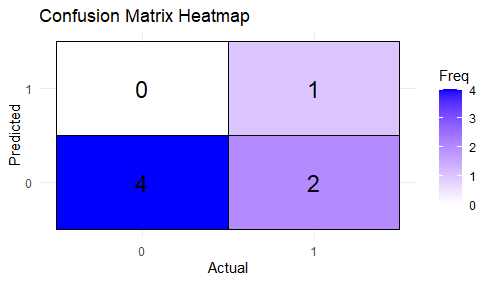

### Interpretation of Confusion Matrix Heatmap

1. The confusion matrix compares predicted engine types against actual engine types using a logistic regression model trained on the `mtcars` dataset.

2. On the X-axis, we have the **Actual** values:
   - `0` represents a V-shaped engine.
   - `1` represents a straight engine.

3. On the Y-axis, we have the **Predicted** values:
   - `0` means the model predicted a V-shaped engine.
   - `1` means the model predicted a straight engine.

4. The values inside the heatmap represent the number of test observations for each outcome:
   - **True Negatives (Predicted 0, Actual 0):** 4 cases — the model correctly identified 4 cars as V-shaped.
   - **True Positives (Predicted 1, Actual 1):** 1 case — the model correctly identified 1 car as straight.
   - **False Positives (Predicted 1, Actual 0):** 0 cases — the model did not mistakenly classify any V-shaped cars as straight.
   - **False Negatives (Predicted 0, Actual 1):** 2 cases — the model incorrectly classified 2 straight-engine cars as V-shaped.

5. From this matrix, we can infer that:
   - The model performs well in predicting V-shaped engines.
   - However, it struggles to correctly identify straight engines, showing a tendency to favor predicting class `0` (V-shaped).

